This is the notebook for tf-idf embeddings and visualizations

In [20]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
reports = pd.read_csv('open_ave_data.csv')
reports = reports.dropna()
reports.head(3)

,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.


In [22]:
report_findings = reports['findings'].str.split().tolist()
report_clinicaldata = reports['clinicaldata'].str.split().tolist()
report_examname = reports['ExamName'].str.split().tolist()
report_impression = reports['impression'].str.split().tolist()
corpus_findings=[word for i in report_findings if isinstance(i, list) for word in i ]
corpus_clinicaldata=[word for i in report_clinicaldata if isinstance(i, list) for word in i ]
corpus_examname=[word for i in report_examname if isinstance(i, list) for word in i ]
corpus_impression=[word for i in report_impression if isinstance(i, list) for word in i ]

In [23]:
vectorizerF=TfidfVectorizer()
vectorizerC=TfidfVectorizer()
vectorizerE=TfidfVectorizer()
vectorizerI=TfidfVectorizer()

In [24]:
X_findings = vectorizerF.fit_transform(corpus_findings)
X_clinicaldata = vectorizerC.fit_transform(corpus_clinicaldata)
X_examname = vectorizerE.fit_transform(corpus_examname)
X_impression = vectorizerI.fit_transform(corpus_impression)

In [25]:
vectorizerF.get_feature_names_out()
vectorizerC.get_feature_names_out()
vectorizerE.get_feature_names_out()
vectorizerI.get_feature_names_out()

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '21', '22', '2249', '2251', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
       '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '______________________________________', '_lcs1', '_lew2',
       'abnormalities', 'abnormality', 'above', 'active', 'acute',
       'aeration', 'agree', 'airspace', 'airway', 'airways', 'alveolar',
       'am', 'amount', 'an', 'and', 'answered', 'aortic', 'apex',
       'apical', 'apparatus', 'appear', 'appearance', 'appearing',
       'appropriate', 'approved', 'are', 'areas', 'artifact', 'as',
       'associated', 'asthma', 'at', 'atelectasis', 'atherosclerosis',
       'atrium', 'attend

In [26]:
X_findings
X_clinicaldata
X_examname
X_impression

<10264x512 sparse matrix of type '<class 'numpy.float64'>'
	with 11057 stored elements in Compressed Sparse Row format>

In [27]:
X_findings.toarray()
X_clinicaldata.toarray()
X_examname.toarray()
X_impression.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
X_embeddedF = TSNE(n_components=2, learning_rate='auto',init='random',perplexity=3).fit_transform(X_findings)
X_embeddedC = TSNE(n_components=2, learning_rate='auto',init='random',perplexity=3).fit_transform(X_clinicaldata)
X_embeddedE = TSNE(n_components=2, learning_rate='auto',init='random',perplexity=3).fit_transform(X_examname)
X_embeddedI = TSNE(n_components=2, learning_rate='auto',init='random',perplexity=3).fit_transform(X_impression)

In [38]:
X_embeddedF
X_embeddedC
X_embeddedE
X_embeddedI

array([[ 64.87991 , -25.870535],
       [ 30.547014,  31.251244],
       [-13.56687 , -65.91444 ],
       ...,
       [ 22.191412,  85.43723 ],
       [-42.035313,  34.04301 ],
       [-24.971336,  15.795795]], dtype=float32)

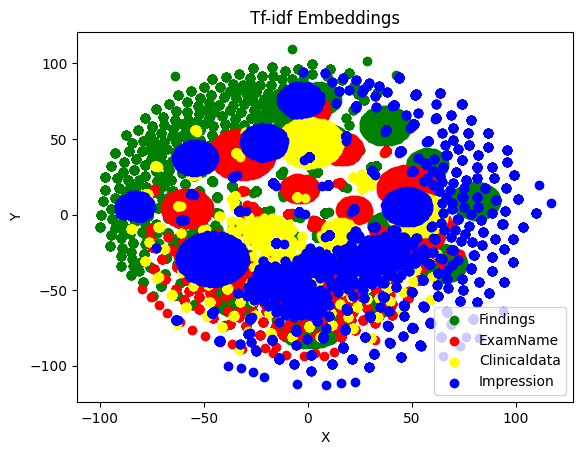

In [44]:
plt.title("Tf-idf Embeddings")
plt.xlabel("X")
plt.ylabel("Y")
# Notation :,# takes all the columns from the number
plt.scatter(X_embeddedF[:,0], X_embeddedF[:,1], c='green')
plt.scatter(X_embeddedE[:,0], X_embeddedE[:,1], c='red')
plt.scatter(X_embeddedC[:,0], X_embeddedC[:,1], c='yellow')
plt.scatter(X_embeddedI[:,0], X_embeddedI[:,1], c='blue')
plt.legend(['Findings', 'ExamName','Clinicaldata','Impression'])

In [36]:
plt.show()